In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('mushroom.csv')
df = pd.get_dummies(df)

df.head()

,p_e,p_p,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,...,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
X_and_Y = df.values
np.random.shuffle(X_and_Y)
X = X_and_Y[:,1:]
Y = X_and_Y[:,0]

In [4]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y, test_size = 0.2, random_state = 42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, test_size = 0.5, random_state = 42)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y, test_size = 0.8, random_state = 42)

In [5]:
def heatmap(training_acc, gamma, C_list):
    plt.figure(figsize = (1,5))
    ax = sns.heatmap(training_acc, annot = True, fmt = '.3f', xticklabels = 7, yticklabels = C_list)
    ax.collections[0].colorbar.set_label("Accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title('Training Accuracy w.r.t $C$ and $\gamma$')
    plt.show()

In [6]:
#knn classifier using train/test #1

def knn(X_train,Y_train,X_test,Y_test):
    K_list = [1,2,3,4,5,6,7]     
    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=7), iid= False, param_grid = {'n_neighbors':K_list}, cv = 5, return_train_score = True)
    clf.fit(X_train,Y_train)
    
    heatmap(clf.cv_results_['mean_train_score'].reshape(7,1), 'KNN Training Accuracy', K_list)
    
    opt_k = clf.best_params_['n_neighbors']
    
    clf_test = KNeighborsClassifier(n_neighbors=opt_k)
    clf_test.fit(X_train,Y_train)
    
    knn_accuracy = clf_test.score(X_test,Y_test)
    training_acc = clf.cv_results_['mean_train_score']
    for x,y in enumerate(K_list):
        if y == opt_k:
            opt_training_acc = training_acc[x]
            
    return knn_accuracy, opt_training_acc, opt_k

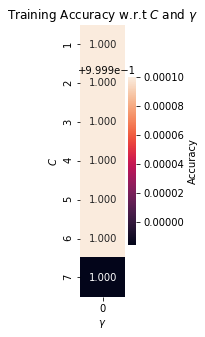

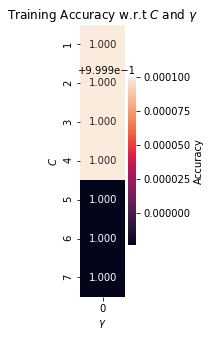

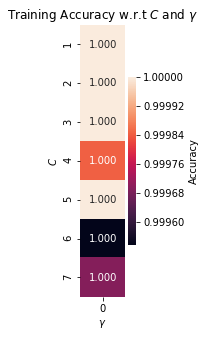

In [8]:
test_acc_KNN1,best_train_KNN1,C_KNN1 = knn(X_train1,Y_train1,X_test1,Y_test1)
test_acc_KNN2,best_train_KNN2,C_KNN2 = knn(X_train2,Y_train2,X_test2,Y_test2)
test_acc_KNN3,best_train_KNN3,C_KNN3 = knn(X_train3,Y_train3,X_test3,Y_test3)

In [9]:
def decisionTree(X_train,Y_train,X_test,Y_test):
    D_list = [1,2,3,4,5,6,7]
    
    clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'),cv=5,iid = False, param_grid = {'max_depth':D_list}, return_train_score = True)
    clf.fit(X_train,Y_train)
    heatmap(clf.cv_results_['mean_train_score'].reshape(7,1),'Decision Tree Training Accuracy', D_list)
    
    opt_D = clf.best_params_['max_depth']
    clf_test = DecisionTreeClassifier(max_depth=opt_D, criterion='entropy')
    
    clf_test.fit(X_train,Y_train)
    
    tree_accuracy = clf_test.score(X_test,Y_test)
    
    train_accuracy = clf.cv_results_['mean_train_score']
    
    for x,y in enumerate(D_list):
        if y == opt_D:
            best_train_accuracy = train_accuracy[x]
            
    return tree_accuracy, best_train_accuracy, opt_D

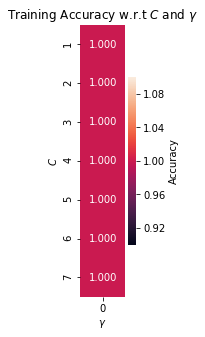

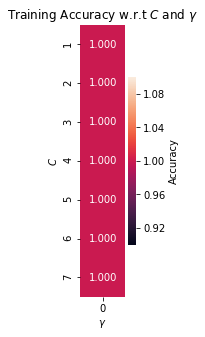

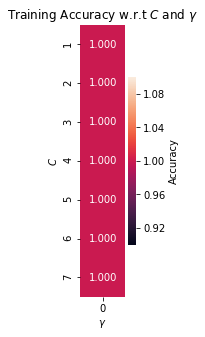

In [10]:
tree_acc1, tree_train_acc1, opt_D1 = decisionTree(X_train1,Y_train1,X_test1,Y_test1)
tree_acc2, tree_train_acc2, opt_D2 = decisionTree(X_train2,Y_train2,X_test2,Y_test2)
tree_acc3, tree_train_acc3, opt_D3 = decisionTree(X_train3,Y_train3,X_test3,Y_test3)

In [11]:
def randomForest(X_train,Y_train,X_test,Y_test):
    
    rf_list = [1,2,3,4,5,6,7]
    
    param_grid = {'max_depth':rf_list, 'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
    rf = RandomForestClassifier(criterion = 'entropy')
    
    clf = GridSearchCV(rf, param_grid= param_grid, cv = 5, iid = False, return_train_score = True)
    
    clf.fit(X_train,Y_train)
    
    heatmap(train_acc.reshape(7,1), 'RF Train Acc', C_list = rf_list)
    opt_rf = clf.best_params_['max_depth']
    
    clf_test = RandomForestClassifier(max_depth = opt_rf, criterion = 'entropy')
    
    clf_test.fit(X_train,Y_train)
    
    rf_accuracy = clf_test.score(X_test,Y_test)
    
    train_accuracy = clf.cv_results_['mean_train_score']

    for x,y in enumerate(rf_list):
        if y == opt_rf:
            best_train_accuracy = train_accuracy[x]
            
    return rf_accuracy, best_train_accuracy, opt_rf
    

In [13]:
def svm(X_train,Y_train,X_test,Y_test):
    #C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1,10]
    C_list = [1,2,3,4,5,6,7]
    #gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
    svc = SVC(C= C_list, gamma = 'auto', kernel = 'linear', max_iter = 100000)
    clf = GridSearchCV(svc, cv=5, iid=False, param_grid={'C':C_list}, return_train_score = True)

    
    #clf = GridSearchCV(LinearSVC(max_iter = 1000000), cv=5, iid=False, param_grid={'C':C_list}, return_train_score = True)
    
    clf.fit(X_train,Y_train)
    
    train_accuracy = clf.cv_results_['mean_train_score']
    heatmap(train_accuracy.reshape(7,1), 'SVM Training Accuracy', C_list)
    opt_C = clf.best_params_['C']
    clf_test = SVC(C = opt_C, gamma = 'auto', kernel='linear')
    
    clf_test.fit(X_train,Y_train)
    
    svm_accuracy = clf_test.score(X_test,Y_test)
    train_accuracy = clf.cv_results_['mean_train_score']
    
    for x,y in enumerate(C_list):
        if y == opt_C:
            best_train_accuracy = train_accuracy[x]
            
    return svm_accuracy, best_train_accuracy, opt_C

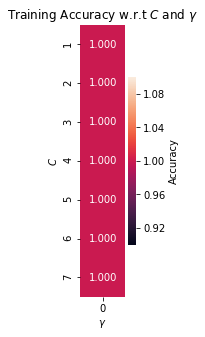

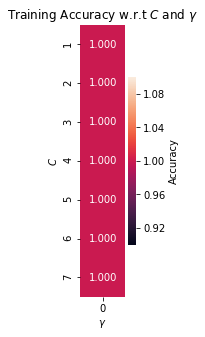

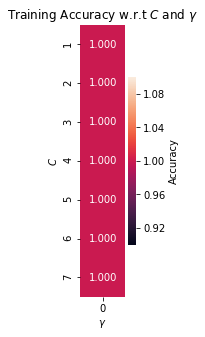

In [14]:
svm_acc1, svm_train_acc1, opt_c1 = svm(X_train1,Y_train1,X_test1,Y_test1)
svm_acc2, svm_train_acc2, opt_c2 = svm(X_train2,Y_train2,X_test2,Y_test2)
svm_acc3, svm_train_acc3, opt_c3 = svm(X_train3,Y_train3,X_test3,Y_test3)

In [15]:
d = {'Classifier Accuracy':[test_acc_KNN1,test_acc_KNN2,test_acc_KNN3,tree_acc1,tree_acc2,tree_acc3,svm_acc1,svm_acc2,svm_acc3],
     'Best Training Accuracy':[best_train_KNN1,best_train_KNN2,best_train_KNN3,tree_train_acc1,tree_train_acc2,tree_train_acc3,svm_train_acc1,svm_train_acc2,svm_train_acc3],
     'Optimal Feature':[C_KNN1,C_KNN2,C_KNN3,opt_D1,opt_D2,opt_D3,opt_c1,opt_c2,opt_c3]}

results = pd.DataFrame(data = d)


In [17]:
#results.index = {'KNN 20/80','KNN 50/50', 'KNN 80/20', 'Decision Tree 20/80', 'Decision Tree 50/50', 'Decision Tree 80/20', 'SVM 20/80', 'SVM 50/50', 'SVM 80/20'}

results.rename(index={0:'KNN 20/80'},inplace=True)
results.rename(index={1:'KNN 50/50'},inplace=True)
results.rename(index={2:'KNN 80/20'},inplace=True)

results.rename(index={3:'Decision Tree 20/80'},inplace=True)
results.rename(index={4:'Decision Tree 50/50'},inplace=True)
results.rename(index={5:'Decision Tree 80/20'},inplace=True)

results.rename(index={6:'SVM 20/80'},inplace=True)
results.rename(index={7:'SVM 50/50'},inplace=True)
results.rename(index={8:'SVM 80/20'},inplace=True)



In [18]:
results

,Classifier Accuracy,Best Training Accuracy,Optimal Feature
KNN 20/80,1.000000,1.0,1
KNN 50/50,1.000000,1.0,1
KNN 80/20,0.999385,1.0,1
Decision Tree 20/80,1.000000,1.0,1
Decision Tree 50/50,1.000000,1.0,1
Decision Tree 80/20,1.000000,1.0,1
SVM 20/80,1.000000,1.0,1
SVM 50/50,1.000000,1.0,1
SVM 80/20,1.000000,1.0,1
